# Neuron

* Человеческий мозг имеет чрезвычайно сложную топологию, и поэтому принято строить его приближенную модель на основе идеализированной нейронной сети *прямого распростронения*, состоящей из дискретных слоев где каждый слой присоединен к следующему. Такое строение, как правило, требует наличия слоя входов в сеть (которые получают входящие сигналы и передает их дальше без изменений), один или несколько "скрытых" слоев (каждый из них состоит из нейронов, которые принимают выходящие сигналы предидущего слоя, выполняют некие вычисления и передают результат в следующий слой) и слоя выходного из сети(который гинерирует окончательный результат)

Но о всем по порядку
===

*Простейшая модель нейронной сети - это однослойный перцептрон, который представляет собой приблеженную математическую модель одиночного нейрона состоящего из n бинарных входящих сигналов или значений. Он вычесляет взвешенную сумму входящих сигналов и активизируется, если эта сумма больше или равна нулю*

In [1]:
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
import numpy as np
from math import exp

In [2]:
def step_function(x):   #Типо Relu  но нет))
    return 1 if x >= 0 else 0

In [3]:
def perceptron_output(weights, bias, x):
    calc = np.dot(weights, x) + bias
    return step_function(calc)

*при правильных весах можно решить задачу "И" (возвращает  1 есле оба входа равны 1)*

In [4]:
weights = [2, 2]
bias = -3

In [5]:
print('x','y','predict')
print("{:d}{:2d}{:8d}".format(0, 0, perceptron_output(weights, bias, [0, 0])))
print("{:d}{:2d}{:8d}".format(1, 0, perceptron_output(weights, bias, [1, 0])))
print("{:d}{:2d}{:8d}".format(0, 1, perceptron_output(weights, bias, [0, 1])))
print("{:d}{:2d}{:8d}".format(1, 1, perceptron_output(weights, bias, [1, 1])))

x y predict
0 0       0
1 0       0
0 1       0
1 1       1


*Задача "ИЛИ"*

In [6]:
weights = [2, 2]
bias = -1

In [7]:
print('x','y','predict')
print("{:d}{:2d}{:8d}".format(0, 0, perceptron_output(weights, bias, [0, 0])))
print("{:d}{:2d}{:8d}".format(1, 0, perceptron_output(weights, bias, [1, 0])))
print("{:d}{:2d}{:8d}".format(0, 1, perceptron_output(weights, bias, [0, 1])))
print("{:d}{:2d}{:8d}".format(1, 1, perceptron_output(weights, bias, [1, 1])))

x y predict
0 0       0
1 0       1
0 1       1
1 1       1


*Задача "НЕ"*

In [8]:
weights = [-2]
bias = 1

In [9]:
print('x','predict')
print("{:d}{:2d}".format(0, perceptron_output(weights, bias, [0])))
print("{:d}{:2d}".format(1, perceptron_output(weights, bias, [1])))

x predict
0 1
1 0


*Но что не под силу перцептрону в одиночку - так решить задачу "Исключающее ИЛИ"*
Ведь эта задача линейно НЕразделимая, а мы как с вами помним перцептрон по своей архитерктуре похож на логистичекую регрессию которая тоже в сво очередь не могла решать линейно не разделимые точки

In [10]:
def sigmoid(t):
    return 1 / (1 + exp(-t))

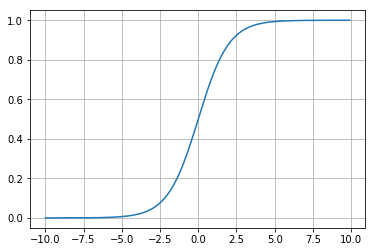

In [11]:
x = [i/10 for i in range(-100, 100)]
y = [sigmoid(i) for i in x]
plt.plot(x, y)
plt.grid(True)

In [12]:
def neuron_output(weights, inputs):
    return sigmoid(np.dot(weights, inputs))

In [13]:
def feed_forward(neuron_network, input_vector):
    """Прнимает нейронную сеть как список списков и вектор входящих сигналов
    возвращает результат прямого распространения входящих сигналов"""
    outputs = []
    for layer in neuron_network:
        input_with_bias = input_vector + [1] #добавить величину смещения
        output = [neuron_output(neuron, input_with_bias) for neuron in layer]
        outputs.append(output)
        # входом для следующего слоя становятся 
        # вектор результатов текущего слоя
        input_vector = output
    return outputs

***

In [14]:
and_ = [[[20, 20, -30]]] # И

In [15]:
print('x','y','predict')
for x in [0, 1]:
    for y in [0, 1]:
        #функция feed_forward возвращает выходные сигналы каждого нейрона
        #feed_forward[-1] - это выходящие сигналы нейронов слоя выходов из сети
        print("{:d}{:2d}{:8d}".format(x, y, round(feed_forward(and_, [x, y])[-1][-1])))

x y predict
0 0       0
0 1       0
1 0       0
1 1       1


***

In [16]:
or_ = [[[20, 20, -10]]] #ИЛИ

In [17]:
print('x','y','predict')
for x in [0, 1]:
    for y in [0, 1]:
        #функция feed_forward возвращает выходные сигналы каждого нейрона
        #feed_forward[-1] - это выходящие сигналы нейронов слоя выходов из сети
        print("{:d}{:2d}{:8d}".format(x, y, round(feed_forward(or_, [x, y])[-1][-1])))

x y predict
0 0       0
0 1       1
1 0       1
1 1       1


***

In [18]:
no_ = [[[-20, 10]]] #НЕ

In [19]:
print('x','y','predict')
for x in [0, 1]:
    #функция feed_forward возвращает выходные сигналы каждого нейрона
    #feed_forward[-1] - это выходящие сигналы нейронов слоя выходов из сети
    print("{:d}{:8d}".format(x, round(feed_forward(no_, [x])[-1][-1])))

x y predict
0       1
1       0


***

In [20]:
test_ = [[[-60, 60, -30]]] # first zero second one

In [21]:
print('x','y','predict')
for x in [0, 1]:
    for y in [0, 1]:
        #функция feed_forward возвращает выходные сигналы каждого нейрона
        #feed_forward[-1] - это выходящие сигналы нейронов слоя выходов из сети
        print("{:d}{:2d}{:8d}".format(x, y, round(feed_forward(test_, [x, y])[-1][-1])))

x y predict
0 0       0
0 1       1
1 0       0
1 1       0


***

In [22]:
xor_network = [        # Exception or
    [[20, 20, -30],    # and
     [20, 20, -10]],   # or
    [[-60, 60, -30]]]  # first zero second one

In [23]:
print('x','y','predict')
for x in [0, 1]:
    for y in [0, 1]:
        #функция feed_forward возвращает выходные сигналы каждого нейрона
        #feed_forward[-1] - это выходящие сигналы нейронов слоя выходов из сети
        print("{:d}{:2d}{:8d}".format(x, y, round(feed_forward(xor_network, [x, y])[-1][-1])))

x y predict
0 0       0
0 1       1
1 0       1
1 1       0


***

Как правило, нейронные сети не создают вручную, потому что с их помощью решают задачи гораздо более масштабные - к примеру, задачи распознования изображений может быть решена с применением сотен или даже тысяч нейронов, а также потому, что обычно невозможно продумать до конца какие значения должны генерировать нейроны.
Вместо этого нейронные сети *обучают* при помощи данных. Одним из популярных решений этой задачи является прменение алгоритма *Обратного распростанения ошибки*, который имеет определенную аналогию с алгоритмом градиентного спуска.

* Выполнить прямой проход по сети, применив функцию feed_forward к входящему вектору, чтобы вычеслить выходящие сигналы всех нейронов сети

* В результате в каждом выходном нейроне генерируется ошибка - разница между его выходящим и целевым значением

* Вычеслить градиент этой ошибки как функцию весов нейрона и затем скорректировать его веса в направлении, которое минимизирует ошибку

* Распростронить ошибки выходящих сигналов на нейроны скрытого слоя, выполнив обратный проход по сети с вычислением ошибок для нейронов скрытого слоя

* Вычислить градиенты этих ошибок и скоректировать веса нейронов скрытого слоя так же, как в П.3

In [24]:
# на входе: сеть, вектор входов, цель
def backpropagate(network, input_vector, targets):
    #выходы из скрытых слоев и выходы из сети
    hidden_outputs, outputs = feed_forward(network, input_vector)#скрытый слой,  выходной слой
    # output * (1 - output) - производная симогиды
    # (output - target) - Error
    # output - выход нейрона (сигмоидальной функции)
    output_deltas = [output * (1 - output) * (output - target) for output, target in zip(outputs, targets)]
    
    #понейронно скоректировать веса для слоя выходов (network[-1])
    for i, output_neuron in enumerate(network[-1]):
        #взять i-ый нейрон слоя выхода
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # скоректировать j-й вес на основе
            # дельты i-го нейрона и его j-го входящего значения
            output_neuron[j] -= output_deltas[i] * hidden_output
        # распростронить ошибку на скрытый слой, двигаясь в обратную сторону
        hidden_deltas = [hidden_output * (1 - hidden_output) * np.dot(output_deltas, [n[i] for n in output_layer])
                        for i, hidden_output in enumerate(hidden_outputs)]
    
    #понейронно скоректировать веса для скрытого слоя (network[0])
    for i, hidden_neuron in enumerate(network[0]):
        for j, input_ in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input_

In [25]:
targets = [[1 if i == j else 0 for i in range(10)] for j in range(10)]

In [26]:
for index, val in enumerate(targets):
    print(val, index)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 2
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 3
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 4
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 5
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 6
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0] 7
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0] 8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 9


In [27]:
import random
random.seed(0)
input_size = 25     #25 входных нейронов (псевдо нейроны)
num_hidden = 6      #5 скрытых нефронов
output_size = 10    #10 в выходном слое
hidden_layer = [[random.random() for _ in range(input_size + 1)] for _ in range(num_hidden)]
output_layer = [[random.random() for _ in range(num_hidden + 1)] for _ in range(output_size)]
network = [hidden_layer, output_layer]

In [28]:
inputs = [[1,1,1,1,1,
           1,0,0,0,1,
           1,0,0,0,1, #0
           1,0,0,0,1,
           1,1,1,1,1],
          
          [0,0,0,1,1,
           0,0,0,0,1,
           0,0,0,0,1,#1
           0,0,0,0,1,
           0,0,0,0,1],
          
          [1,1,1,1,1,
           0,0,0,0,1,
           1,1,1,1,1,#2
           1,0,0,0,0,
           1,1,1,1,1],
          
          [1,1,1,1,1,
           0,0,0,0,1,
           1,1,1,1,1,#3
           0,0,0,0,1,
           1,1,1,1,1],
          
          [1,0,0,0,1,
           1,0,0,0,1,
           1,1,1,1,1,#4
           0,0,0,0,1,
           0,0,0,0,1],
          
          [1,1,1,1,1,
           1,0,0,0,0,
           1,1,1,1,1,#5
           0,0,0,0,1,
           1,1,1,1,1],
          
          [1,1,1,1,1,
           1,0,0,0,0,
           1,1,1,1,1,#6
           1,0,0,0,1,
           1,1,1,1,1],
          
          [1,1,1,1,1,
           0,0,0,1,0,
           0,0,1,0,0,#7
           0,1,0,0,0,
           1,0,0,0,0],
          
          [1,1,1,1,1,
           1,0,0,0,1,
           1,1,1,1,1,#8
           1,0,0,0,1,
           1,1,1,1,1],
          
          [1,1,1,1,1,
           1,0,0,0,1,
           1,1,1,1,1,#9
           0,0,0,0,1,
           1,1,1,1,1]]

In [29]:
for _ in tqdm(range(10 ** 4)): # 10000 эпох обечения
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 184.69it/s]


In [30]:
def predict(input_):
    return [round(i) for i in feed_forward(network, input_)[-1]]

In [31]:
for i in range(10):
    print(predict(inputs[i]), i)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 2
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 3
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 4
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 6
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0] 7
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0] 8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 9


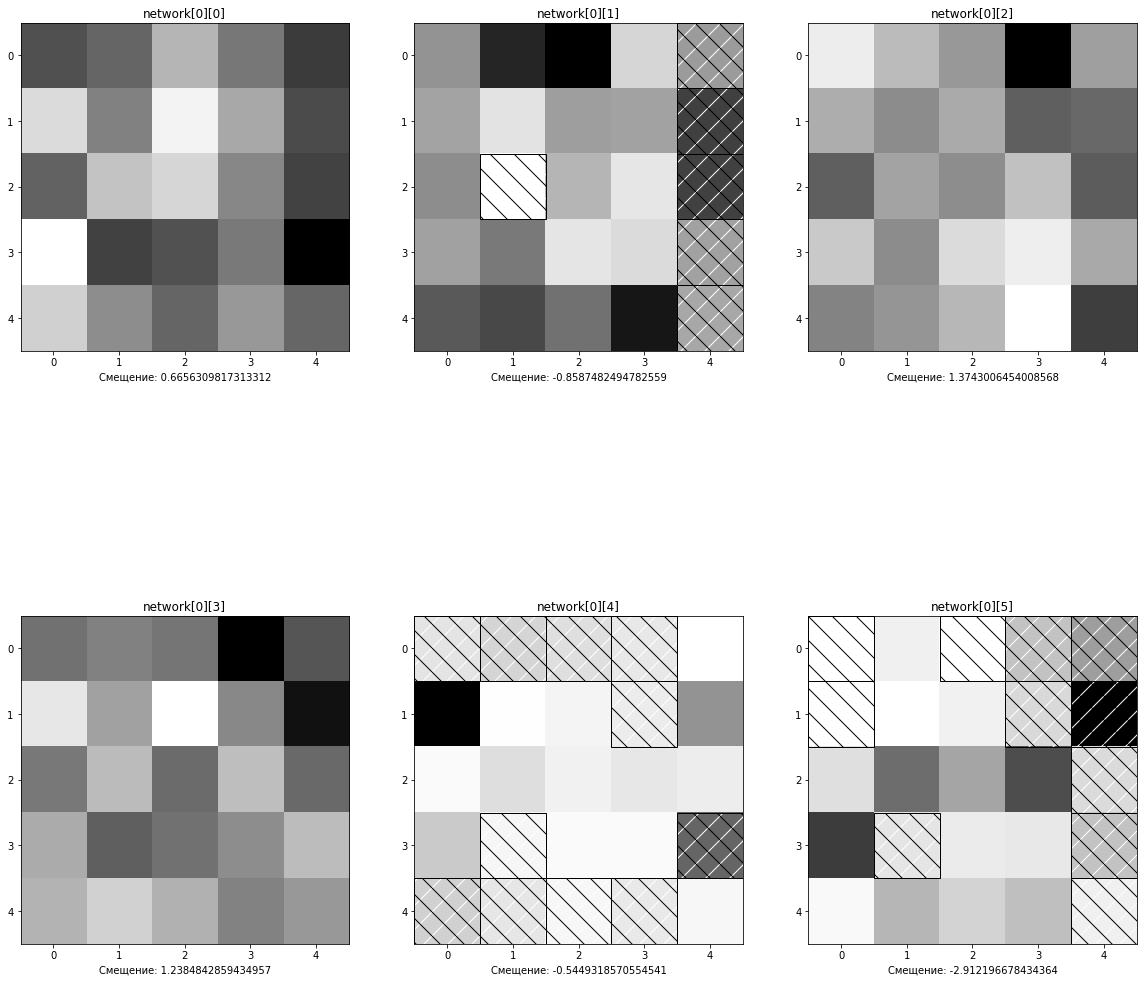

'чем темнее пиксель - тем выше значекние веса, заштрихованный пиксель - отрицателен'

In [32]:
import matplotlib
fig, axes = plt.subplots(2, 3, figsize=(20, 20))
axes = axes.flatten()

def patch(x, y, hatch, color):
    """вернуть объект 'path' библиотеки matplotlib с указанными
    координатами, шаблоном штриховки и цветом"""
    return matplotlib.patches.Rectangle((x - 0.5, y - 0.5), 1, 1, hatch=hatch, fill=False, color=color)

for num, ax in enumerate(axes):
    weights = network[0][num]
    abs_weights = [abs(i) for i in weights]
    grid = [abs_weights[row:(row + 5)] for row in range(0, 25, 5)]
    ax.imshow(grid, cmap = matplotlib.cm.binary)

    for i in range(5):
        for j in range(5):
            if weights[5 * i + j] < 0:
                ax.add_patch(patch(j, i, '/', 'white'))
                ax.add_patch(patch(j, i, '\\', 'black'))
                
    ax.set_title('network[0][{:}]'.format(num))
    ax.set_xlabel("Смещение: {:}".format(weights[-1]))
plt.show()
"""чем темнее пиксель - тем выше значекние веса, заштрихованный пиксель - отрицателен"""

In [33]:
len(network[1][0])

7

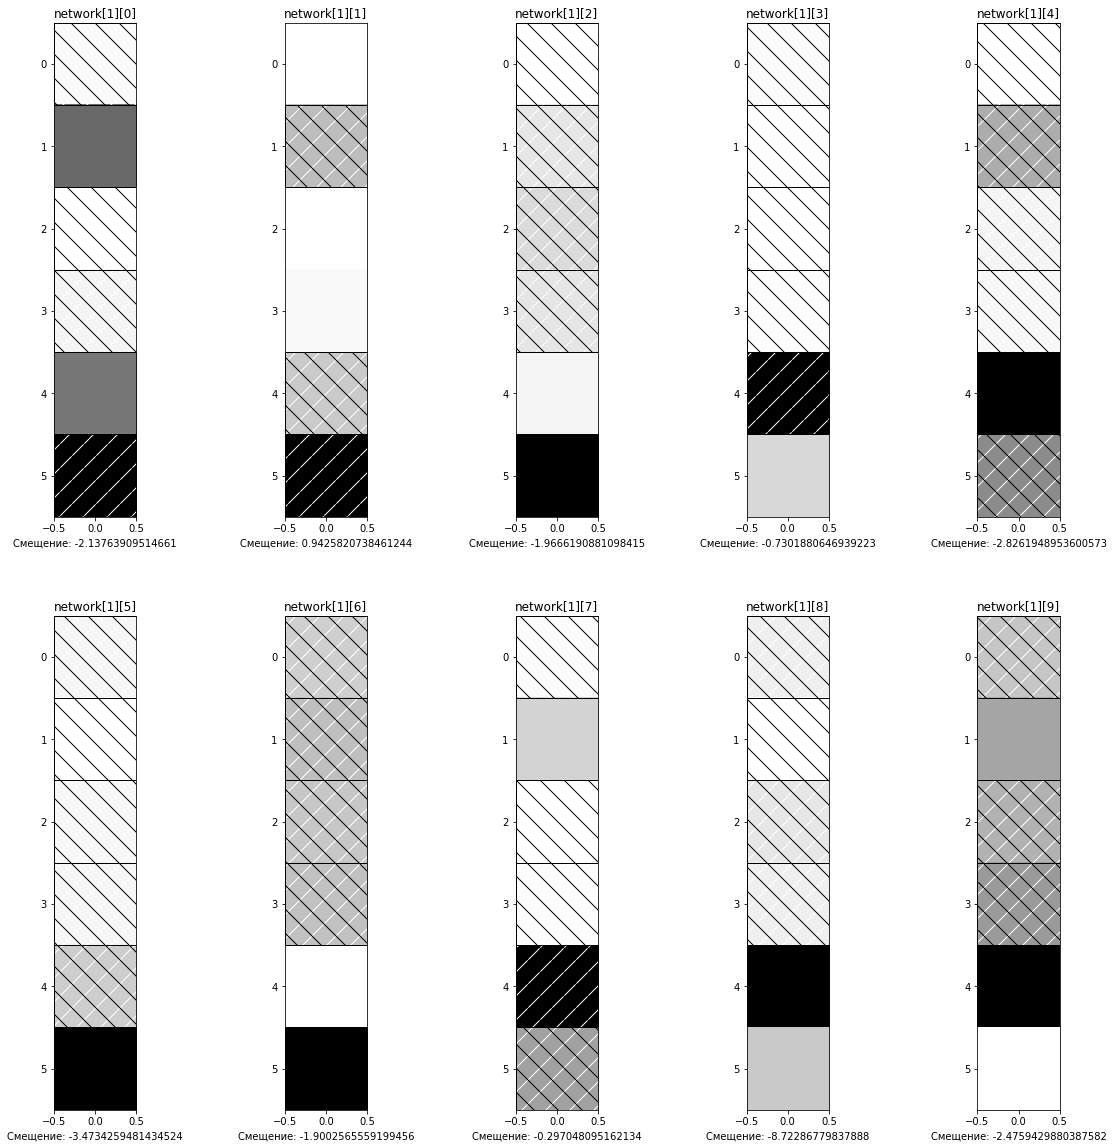

'чем темнее пиксель - тем выше значекние веса, заштрихованный пиксель - отрицателен'

In [34]:
fig, axes = plt.subplots(2, 5, figsize=(20, 20))
axes = axes.flatten()

def patch(x, y, hatch, color):
    """вернуть объект 'path' библиотеки matplotlib с указанными
    координатами, шаблоном штриховки и цветом"""
    return matplotlib.patches.Rectangle((x - 0.5, y - 0.5), 1, 1, hatch=hatch, fill=False, color=color)

for num, ax in enumerate(axes):
    weights = network[1][num]
    abs_weights = [abs(i) for i in weights]
    grid = [abs_weights[row:(row + 1)] for row in range(0, 6)]
    ax.imshow(grid, cmap = matplotlib.cm.binary)

    for i in range(6):
            if weights[i] < 0:
                ax.add_patch(patch(0, i, '/', 'white'))
                ax.add_patch(patch(0, i, '\\', 'black'))
                
    ax.set_title('network[1][{:}]'.format(num))
    ax.set_xlabel("Смещение: {:}".format(weights[-1]))
plt.show()
"""чем темнее пиксель - тем выше значекние веса, заштрихованный пиксель - отрицателен"""

In [35]:
from sklearn.datasets import load_digits
x = load_digits().data
y = load_digits().target

In [36]:
newtarget = [[0 for i in range(10)] for i in y]
for i, t in enumerate(newtarget):
    t[y[i]] = 1

In [37]:
random.seed(0)
input_size = 64     #64 входных нейронов (псевдо нейроны)
num_hidden = 6      #6 скрытых нейронов
output_size = 10    #10 в выходном слое
hidden_layer = [[random.random() for _ in range(input_size + 1)] for _ in range(num_hidden)]
output_layer = [[random.random() for _ in range(num_hidden + 1)] for _ in range(output_size)]
network = [hidden_layer, output_layer]

In [38]:
x.shape

(1797, 64)

In [39]:
np.ones(1797).reshape((-1,1)).shape

(1797, 1)

In [40]:
x = np.hstack((x, np.ones(1797).reshape((-1,1))))

In [41]:
for _ in tqdm(range(10 ** 2)): # 100 эпох обечения
    for input_vector, target_vector in zip(x, newtarget):
        backpropagate(network, input_vector, target_vector)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:44<00:00,  1.02s/it]


In [42]:
for i in range(50):#не хвататет глубины
    print(predict(x[i]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [45]:
model = MLPClassifier(activation='logistic')

In [46]:
model.fit(x_train, y_train)

C:\Users\Bogdan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [47]:
model.score(x_test,y_test)

0.9777777777777777

In [50]:
print(len(model.coefs_[0]))
print(len(model.coefs_[1]))

65
100


In [52]:
model.predict(x[1].reshape((1,-1)))[0]

1

In [53]:
y[1]

1

In [54]:
random.seed(0)
input_size = 64     #64 входных нейронов (псевдо нейроны)
num_hidden = 10      #10 скрытых нейронов
output_size = 10    #10 в выходном слое
hidden_layer = [[random.random() for _ in range(input_size + 1)] for _ in range(num_hidden)]
output_layer = [[random.random() for _ in range(num_hidden + 1)] for _ in range(output_size)]
network = [hidden_layer, output_layer]

In [55]:
for _ in tqdm(range(10 ** 2)): # 100 эпох обечения
    for input_vector, target_vector in zip(x, newtarget):
        backpropagate(network, input_vector, target_vector)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:57<00:00,  1.76s/it]


In [56]:
for i in range(50):#наша модель слишком простая
    print(predict(x[i]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0

In [57]:
model2 = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic')

In [58]:
model2.fit(x_train, y_train)

C:\Users\Bogdan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [59]:
model2.score(x_test,y_test)

0.8844444444444445

In [60]:
print(len(model2.coefs_[0]))
print(len(model2.coefs_[1]))
print(len(model2.coefs_[2]))

65
10
10
